## Observations and Insights 

In [473]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df=pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice.

mice_count = merge_df["Mouse ID"].count()


mice_count


1893

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]


duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_id_dup = merge_df[merge_df.duplicated(['Mouse ID'])]

mouse_id_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df=merge_df.drop_duplicates("Mouse ID")

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [121]:
# Checking the number of mice in the clean DataFrame.

mice_count2 = clean_df["Mouse ID"].count()

mice_count2

249

## Summary Statistics

In [474]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


Mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
STD = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summmary_df = pd.DataFrame({"Mean": Mean, "Median": Median, "Variance": Variance, "Standard Deviation": STD, "SEM": Sem})

summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [479]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


grouped = merge_df.groupby("Drug Regimen")

sum_stats_df = pd.DataFrame(grouped.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"])


sum_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

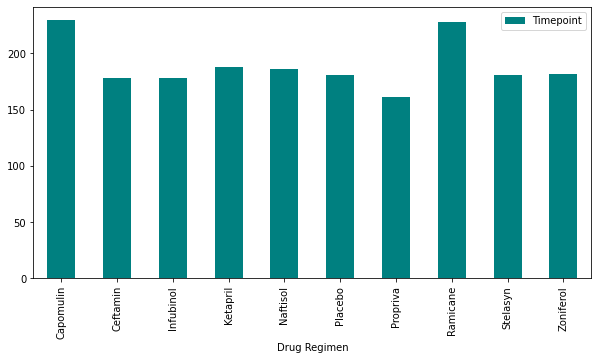

In [480]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_df=pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()


#timepoints_df

timepoints_df.plot(x="Drug Regimen",y="Timepoint",kind="bar", figsize=(10,5),facecolor="teal")

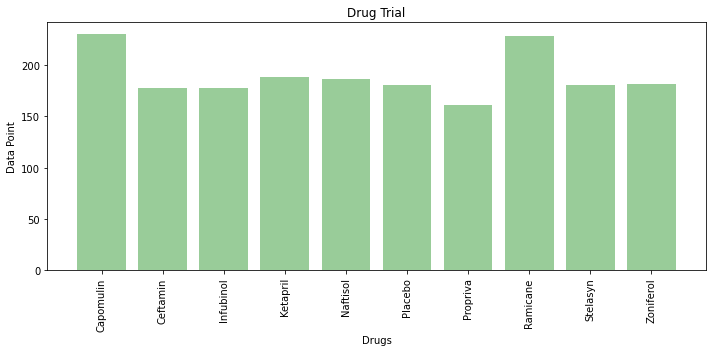

In [481]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, timepoints_df["Timepoint"], color='g', alpha=0.4, align="center")
plt.xticks(tick_locations, timepoints_df["Drug Regimen"], rotation="vertical")
plt.title("Drug Trial")
plt.xlabel("Drugs")
plt.ylabel("Data Point")
plt.tight_layout()
plt.show()

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = pd.DataFrame(merge_df.groupby(["Sex"]).count()).reset_index()
#gender_df.head()


gender_count = gender_df[["Sex","Mouse ID"]]
#gender_count

#renamed_df = gender_count.rename(columns={"Mouse ID": "Count"})



renamed_df.head()




,Sex,Count
0,Female,935
1,Male,958


<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Count'>

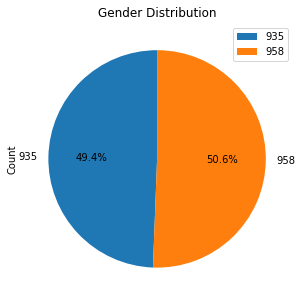

In [358]:




#renamed_df.plot.pie(autopct="%1.1f%%", startangle=90, title='Gender Distribution',figsize=(10, 10))

renamed_df.groupby(['Sex']).sum().plot(kind='pie',y='Count',autopct="%1.1f%%", startangle=90, title='Gender Distribution',figsize=(5, 5))





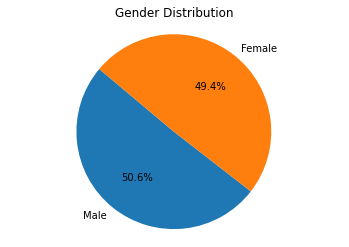

In [361]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_data_df = merge_df['Sex'].value_counts()

plt.pie(pie_data_df,labels=pie_data_df.index.values,autopct="%1.1f%%", startangle=140)
plt.title('Gender Distribution')
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [482]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugref_df = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#drugref_df
drugindex_df=drugref_df.reset_index()
tumorvol_mean_df = drugindex_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorvolfinal_df=pd.DataFrame(tumorvol_df)

tumorvolfinal_df.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ramicane,40.216745


In [503]:
# Start by getting the last (greatest) timepoint for each mouse

drug_timepoints_df = merge_df.groupby('Mouse ID').max()['Timepoint']


drug_timepoints_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


merging_df = pd.merge(drug_timepoints_df, merge_df, on=("Mouse ID","Timepoint",),how="left")


merging_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [511]:
# Put treatments into a list for for loop (and later for plot labels)


for Drug in drugmerge_df:
    drug_list_df = merging_df.loc[(merging_df["Drug Regimen"] == "Capomulin") | (merging_df["Drug Regimen"] == "Ramicane") | (merging_df["Drug Regimen"] == "Infubinol") | (merging_df["Drug Regimen"] == "Ceftamin"), :]

drug_list_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [561]:
# Create empty list to fill with tumor vol data (for plotting)

tumorvol_values = []



#Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumorvol_total=drug_list_df['Tumor Volume (mm3)']

quartiles = tumorvol_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 'Tumor Volume' is: {lowerq}")
print(f"The upper quartile of'Tumor Volume' is: {upperq}")
print(f"The interquartile of 'Tumor Volume' is: {iqr}")
print(f"The the median of 'Tumor Volume' is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of 'Tumor Volume' is: 37.1877438025
The upper quartile of'Tumor Volume' is: 59.930261755
The interquartile of 'Tumor Volume' is: 22.742517952499995
The the median of 'Tumor Volume' is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [576]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
data=pd.DataFrame(drug_list_df)
data_grouped_df=data.groupby("Drug Regimen").mean()

#data_grouped_df

rows_df=data_grouped_df.drop(['Weight (g)','Age_months', 'Timepoint','Metastatic Sites'], axis = 1)

rows_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ramicane,36.191390


In [590]:
    #add subset 

    
    # Determine outliers using upper and lower bounds
    
tumorvol2_total=rows_df['Tumor Volume (mm3)']

quartiles = tumorvol2_total.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 4.581242393450005 could be outliers.
Values above 89.82732506824999 could be outliers.


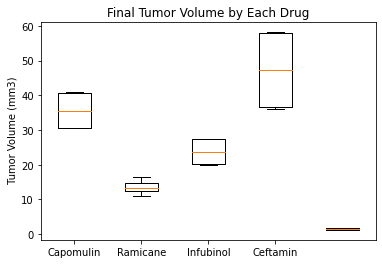

In [592]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest'


plt.boxplot(data_grouped_df)
plt.title('Final Tumor Volume by Each Drug')
plt.ylabel(' Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()








## Line and Scatter Plots

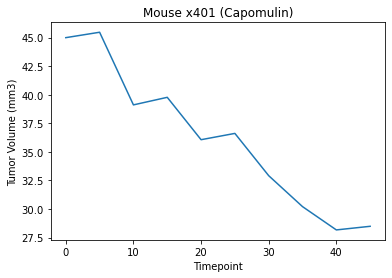

In [598]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse_sample = merge_df.loc[merge_df['Mouse ID'] == 'x401']
#mouse_sample


plt.plot(mouse_sample['Timepoint'], mouse_sample['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse x401 (Capomulin)")
plt.show()




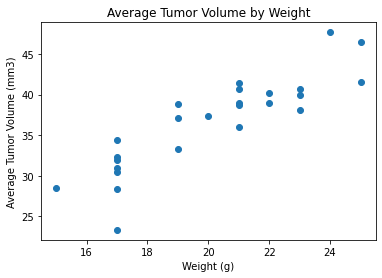

In [622]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capo_df = drug_list_df.loc[drug_list_df['Drug Regimen'] == 'Capomulin']
capo_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()

#pprint(capo_df)

#capo_vol_df


totaled_df = pd.merge(capo_df, capo_vol_df, on='Mouse ID')

#totaled_df
final_df = totaled_df[['Weight (g)','Tumor Volume (mm3)_x']].drop_duplicates()

#final_df

x = final_df['Weight (g)']
y = final_df['Tumor Volume (mm3)_x']
plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

In [643]:
## Correlation and Regression

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_df = drug_list_df.loc[drug_list_df['Drug Regimen'] == 'Capomulin']
capo_vol_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()

#pprint(capo_df)

#capo_vol_df


totaled_df = pd.merge(capo_df, capo_vol_df, on='Mouse ID')

#totaled_df

final_df = totaled_df[['Weight (g)','Tumor Volume (mm3)_x']].drop_duplicates()

# final_df

x = final_df['Weight (g)']
y = final_df['Tumor Volume (mm3)_x']
plt.scatter(x, y)
m_slope, m_int, m_r, m_p, m_std_err = final_df.linregress(Weight (g), Tumor Volume (mm3)_x)
m_fit = m_slope * Weight (g) + m_int
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()





SyntaxError: invalid syntax (<ipython-input-643-be0ec846fbac>, line 25)